# Exploratory Data Analysis


Lipinski's rule-of-five descriptor is often used in Exploratory Data Analysis (EDA). Lipinski's rule is a set of guidelines used in drug discovery to evaluate whether a chemical compound has properties that make it a potential orally active drug. The rule states that a compound is more likely to have good oral bioavailability if it has:

* A molecular weight (MW) less than 500
* A logP (Octanol-water partition coefficient) less than 5
* Not more than 5 hydrogen bond donors
* Not more than 10 hydrogen bond acceptors

Based on the IC50 value, which is the concentration of a compound required to inhibit 50% of a biological activity, the bioactive substances can be classified as active, inactive, or intermediate. This information can be used to identify potential drug candidates and to understand the structure-activity relationship of the compounds.










Rdkit will allow you to compute the molecular descriptor compounds from the dataset compiled in Part 1.
Installing Conda and Rdkit is necessary for this EDA.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-04-18 20:26:37--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   166MB/s    in 0.5s    

2023-04-18 20:26:38 (166 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Loading curated CSV data from previous notebook (Pre-Processed Data)

In [ ]:
df = pd.read_csv('plk1_03_bioactivity_data_curated (1).csv')
df
     

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,100000.0,inactive
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,20000.0,inactive
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,100000.0,inactive
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,100000.0,inactive
...,...,...,...,...
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,200.0,active
1307,CHEMBL5075075,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1650.0,intermediate
1308,CHEMBL5093970,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1230.0,intermediate
1309,CHEMBL5078060,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...,830.0,active


# Rearranging Canonical smiles to the end of DF.



In [ ]:

df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL115220,10000.0,inactive,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1
1,CHEMBL200586,100000.0,inactive,COC(=O)c1cc2c(C)n[nH]c2s1
2,CHEMBL199996,20000.0,inactive,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12
3,CHEMBL199658,100000.0,inactive,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12
4,CHEMBL199657,100000.0,inactive,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12
...,...,...,...,...
1306,CHEMBL5082952,200.0,active,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...
1307,CHEMBL5075075,1650.0,intermediate,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...
1308,CHEMBL5093970,1230.0,intermediate,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...
1309,CHEMBL5078060,830.0,active,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...


# Calculating using Lipinski Descriptors
Pfizer chemist Christopher Lipinski developed a set of guidelines for assessing compound druglikeness. The Absorption, Distribution, Metabolism, and Excretion (ADME) profile, also known as the pharmacokinetic profile, is used to determine druglikeness. Lipinski developed the Rule-of-Five, often known as Lipinski's Rule, after analyzing all orally active FDA-approved medications.

ADME tells us about a compound's relative drug likeliness is whether it can be absorbed into the body, transported to the appropriate tissue and organs to metabolize, and subsequently eliminated from the body. 

In [ ]:
#Importing libraries for Lipinski Descriptors
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

The Lipinski's Rule stated the following:



*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10
*   Note all of the following is in multiples of 5.



##Calculate Lipinski descriptor
The descriptor code have been re-modified to a custom function that includes the descriptors  for this analysis and inspired by the link provided below.

https://codeocean.com/explore/capsules?query=tag:data-curation 

In [ ]:
#Calculate Lipinski descriptor 

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

The Lipinski function takes in the SMILES notation of a molecule, which provides a detailed description of its chemical structure and atomic composition. Using this information, the function calculates four important molecular descriptors: molecular weight, octanol-water partition coefficient (logP), hydrogen bond donor count, and hydrogen bond acceptor count.

These descriptors are crucial for understanding the pharmacological properties of a molecule and can be used to predict its potential as a drug candidate. In particular, the Lipinski rule of five, which is based on these descriptors, is a widely recognized guideline in the field of drug discovery. By following this rule, researchers can identify molecules that are likely to have good oral bioavailability and permeability, which are essential characteristics for a drug to be effective in the body.


In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,291.354,3.62150,2.0,2.0
1,196.231,1.71942,1.0,4.0
2,315.358,2.67572,4.0,4.0
3,334.788,2.93742,3.0,4.0
4,334.788,2.93742,3.0,4.0
...,...,...,...,...
1306,928.971,0.26190,8.0,14.0
1307,973.968,-1.62370,9.0,16.0
1308,991.986,-0.50210,9.0,15.0
1309,1197.233,-1.65770,8.0,22.0


# Combining 2 Dataframes

*   The lipinski df
*   Original df 



In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,291.354,3.62150,2.0,2.0
1,196.231,1.71942,1.0,4.0
2,315.358,2.67572,4.0,4.0
3,334.788,2.93742,3.0,4.0
4,334.788,2.93742,3.0,4.0
...,...,...,...,...
1306,928.971,0.26190,8.0,14.0
1307,973.968,-1.62370,9.0,16.0
1308,991.986,-0.50210,9.0,15.0
1309,1197.233,-1.65770,8.0,22.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,100000.0,inactive
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,20000.0,inactive
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,100000.0,inactive
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,100000.0,inactive
...,...,...,...,...
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,200.0,active
1307,CHEMBL5075075,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1650.0,intermediate
1308,CHEMBL5093970,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1230.0,intermediate
1309,CHEMBL5078060,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...,830.0,active


# Combined Dataframe
By combining the two dataframes, we can have access to both the standard value and bioactivity class columns in one dataframe. The standard value column provides information about the potency of the compound, while the bioactivity class column provides information about the activity of the compound against a specific target.

By having both pieces of information in one dataframe, we can easily compare and analyze the potency and activity of different compounds. This can be particularly useful in drug discovery research, where the goal is to identify compounds that have both high potency and activity against a specific target.

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)


In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,10000.0,inactive,291.354,3.62150,2.0,2.0
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,100000.0,inactive,196.231,1.71942,1.0,4.0
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,20000.0,inactive,315.358,2.67572,4.0,4.0
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,100000.0,inactive,334.788,2.93742,3.0,4.0
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,100000.0,inactive,334.788,2.93742,3.0,4.0
...,...,...,...,...,...,...,...,...
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,200.0,active,928.971,0.26190,8.0,14.0
1307,CHEMBL5075075,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1650.0,intermediate,973.968,-1.62370,9.0,16.0
1308,CHEMBL5093970,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,1230.0,intermediate,991.986,-0.50210,9.0,15.0
1309,CHEMBL5078060,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...,830.0,active,1197.233,-1.65770,8.0,22.0


# Converting 1C50 to PIC50
PIC50 is the approach for depicting the IC50 values as the negative logarithm of IC50 in molar concentration, therefore it makes data more convenient for the readers to understand and compare the potency of different drugs at the same molar levels.

We will convert IC50 to the negative logarithmic scale, which is effectively -log10(IC50), to make the data more consistently distributed.

This custom method pIC50() will take a DataFrame as input and will do the following:

Take the IC50 values from the standard_value column and multiply them by 10^-9 to convert them from nM to M.
Apply -log10 to the molar value.
Remove the standard_value column and replace it with a new pIC50 column.

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count      1311.000000
mean      17154.215558
std       55965.805081
min           0.400000
25%          40.870000
50%        1170.000000
75%       10000.000000
max      600000.000000
Name: standard_value, dtype: float64

**Values larger than 100,000,000 remain fixed at 100,000,000; otherwise, the negative logarithmic value becomes negative.**

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

Applying the norm_value() function so that the values in the standard_value column is normalized.

Essentially, norm_value will read through the individual values in the standard value column and, if the value is greater than a 100 million, it will cap the value at a 100 million so that the value does not exceed 100 mill and, as a result, it will not be less than 1.0 after performing negative logarithmic transformation.

 The normalized value is then added to the 'norm' list. Finally, a new column 'standard_value_norm' is added to the input dataframe with the normalized values, and the 'standard_value' column is dropped. The normalized dataframe is returned.

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x


By applying this function to df_combined, we have created a new DataFrame called df_norm with the normalized standard_value column.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-142-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,10000.0
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,inactive,196.231,1.71942,1.0,4.0,100000.0
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,inactive,315.358,2.67572,4.0,4.0,20000.0
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,inactive,334.788,2.93742,3.0,4.0,100000.0
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,inactive,334.788,2.93742,3.0,4.0,100000.0
...,...,...,...,...,...,...,...,...
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,928.971,0.26190,8.0,14.0,200.0
1307,CHEMBL5075075,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,intermediate,973.968,-1.62370,9.0,16.0,1650.0
1308,CHEMBL5093970,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,intermediate,991.986,-0.50210,9.0,15.0,1230.0
1309,CHEMBL5078060,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...,active,1197.233,-1.65770,8.0,22.0,830.0


This is descriptive statistics for the column 'standard_value_norm' in the dataframe df_norm. The descriptive statistics include count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value. This can provide an overview of the distribution of the data in this column.






In [ ]:

df_norm.standard_value_norm.describe()

count      1311.000000
mean      17154.215558
std       55965.805081
min           0.400000
25%          40.870000
50%        1170.000000
75%       10000.000000
max      600000.000000
Name: standard_value_norm, dtype: float64

The standard value has been removed, and it has been transformed to PIC50, which is the negative logarithmic version of ic50.

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-138-fdebd4873966>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,inactive,196.231,1.71942,1.0,4.0,4.000000
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,inactive,315.358,2.67572,4.0,4.0,4.698970
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,inactive,334.788,2.93742,3.0,4.0,4.000000
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,inactive,334.788,2.93742,3.0,4.0,4.000000
...,...,...,...,...,...,...,...,...
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,928.971,0.26190,8.0,14.0,6.698970
1307,CHEMBL5075075,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,intermediate,973.968,-1.62370,9.0,16.0,5.782516
1308,CHEMBL5093970,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,intermediate,991.986,-0.50210,9.0,15.0,5.910095
1309,CHEMBL5078060,COCCOCCOCCOCCOc1cc(OCCOCCOCCOCCOC)cc(C(=O)N[C@...,active,1197.233,-1.65770,8.0,22.0,6.080922


In [ ]:
df_final.pIC50.describe()


count    1311.000000
mean        6.176888
std         1.451681
min         3.221849
25%         5.000000
50%         5.931814
75%         7.388598
max         9.397940
Name: pIC50, dtype: float64

save csv

In [ ]:
df_final.to_csv('plk1_04_bioactivity_data_3class_pIC50.csv')

#Will be removing the 'intermediate' bioactivity class for further analysis

* In drug discovery, we are typically interested in identifying compounds that have potent biological activity, which would be classified as either "active" or "inactive" based on the bioactivity threshold we have set. The "intermediate" class may contain compounds that have some level of activity, but may not be as interesting to us as those that are clearly "active" or "inactive". Therefore, removing the "intermediate" class can help us focus on the compounds that are most relevant to any research goals.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
1,CHEMBL200586,COC(=O)c1cc2c(C)n[nH]c2s1,inactive,196.231,1.71942,1.0,4.0,4.000000
2,CHEMBL199996,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)Nc3ccccc3)c12,inactive,315.358,2.67572,4.0,4.0,4.698970
3,CHEMBL199658,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3ccc(Cl)cc3)c12,inactive,334.788,2.93742,3.0,4.0,4.000000
4,CHEMBL199657,Cc1n[nH]c2sc(C(N)=O)c(NC(=O)c3cccc(Cl)c3)c12,inactive,334.788,2.93742,3.0,4.0,4.000000
...,...,...,...,...,...,...,...,...
1301,CHEMBL5083550,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,908.966,-3.13160,10.0,15.0,6.167491
1304,CHEMBL5089536,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,856.864,-0.77290,8.0,13.0,6.193820
1305,CHEMBL5083531,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,943.986,-0.83250,8.0,15.0,6.301030
1306,CHEMBL5082952,COC(=O)[C@H](CC(C)C)NC(=O)[C@@H]1CC[C@H]2OCCNC...,active,928.971,0.26190,8.0,14.0,6.698970


# Storing CSV

In [ ]:
df_2class.to_csv('plk1_05_bioactivity_data_2class_pIC50.csv')


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Exploratory Data Analysis on Lipinski Descriptor

#Frequency Plot

This generates a frequency plot of the bioactivity classes in the pre-processed data. It uses the countplot() function from the seaborn library to count the number of compounds in each bioactivity class and display them as a bar chart.

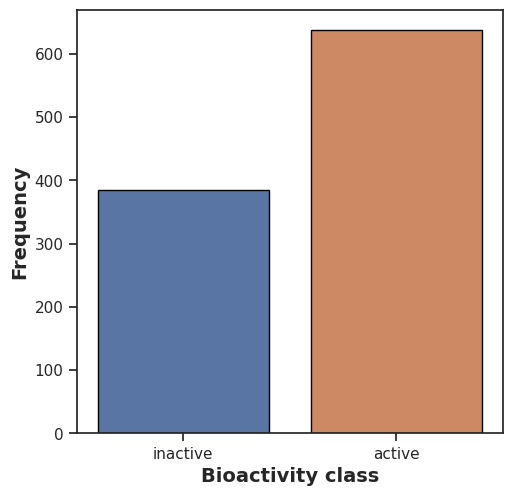

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot comparing MW and LogP. This diagram shows that both bioactivity classes occupy comparable chemical areas.


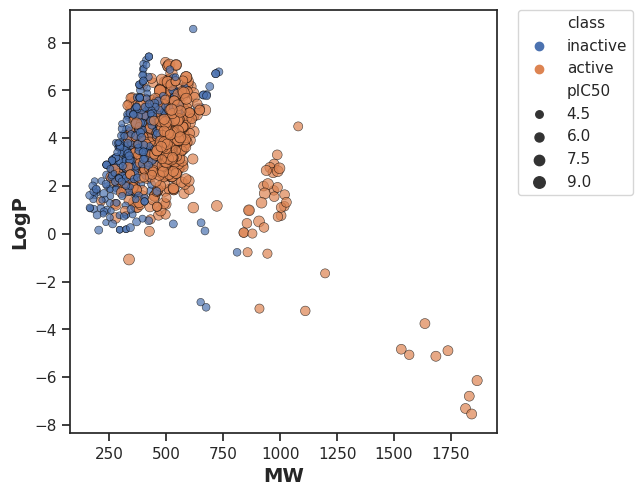

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

The distribution of the active and inactive classes This is to be anticipated because we utilized the threshold to distinguish between active and inactive bioactivity.
The threshold is 5 and 6 is that if the PIC50 value is larger than 6, it is active, and if it is less than 5 it is inactive.

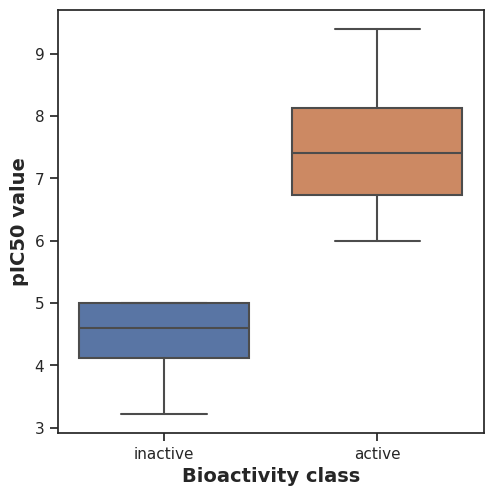

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

# Mann-Whitney U Test

The Mann-Whitney U test is a nonparametric statistical test that can be used to determine whether two independent groups have different central tendencies, and is often used in situations where the data do not meet the assumptions of parametric tests such as the t-test. If the Mann-Whitney U test finds a significant difference between the distributions of pIC50 values for the active and inactive classes, it would suggest that this variable is a good predictor of bioactivity.

Box plots showing Mann-Whitney U test findings, displaying LogP, MW, NumHAcceptors, NumHDonors, and pIC50. LogP is a widely used measure for determining a compound's lipophilicity, as well as its permeability and membrane penetration. However, the molecular weight (MW) of a substance is critical for estimating the correct size of a compound. Its numerical values are critical for passage across a lipid membrane. NumHAcceptors and NumHDonors, on the other hand, are used to quantify hydrogen bonding capability and refer to the number of hydrogen bond acceptors and donors, respectively.





In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,245630.0,7.618979e-159,0.05,Different distribution (reject H0)


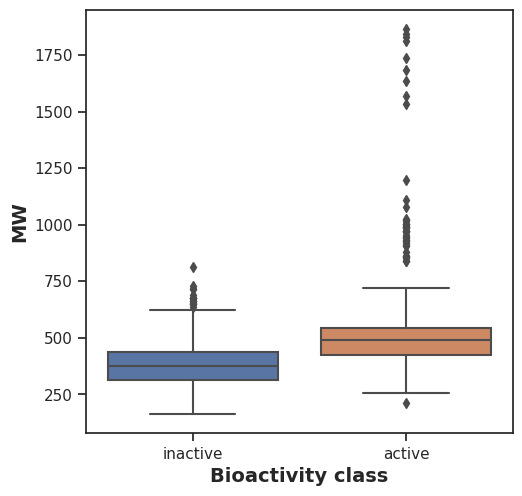

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,191093.5,2.690671e-50,0.05,Different distribution (reject H0)


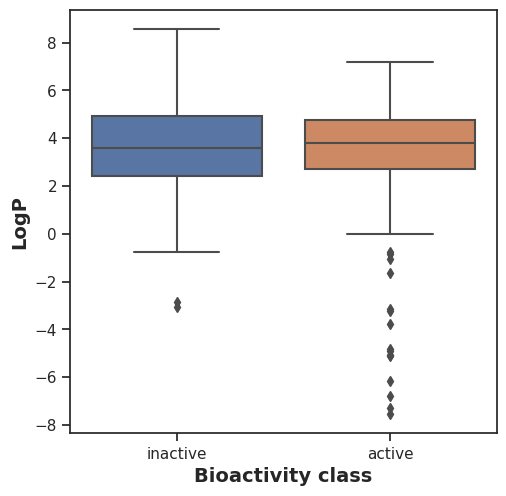

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,127447.0,0.311715,0.05,Same distribution (fail to reject H0)


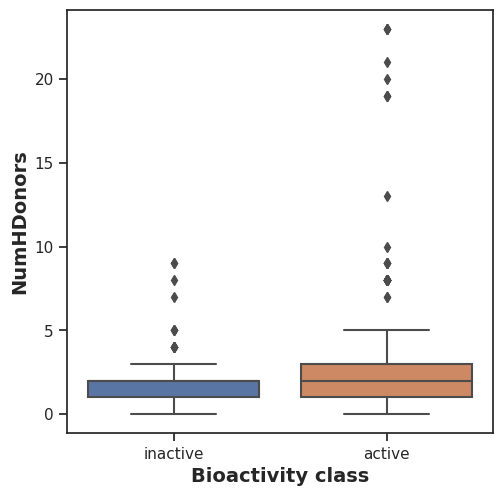

In [ ]:
 
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,131671.0,0.040428,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: plot_NumHDonors.pdf (deflated 39%)
updating: plot_MW_vs_LogP.pdf (deflated 4%)
updating: plot_bioactivity_class.pdf (deflated 37%)
updating: plot_MW.pdf (deflated 39%)
updating: plot_LogP.pdf (deflated 37%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: plot_ic50.pdf (deflated 36%)
updating: plk1_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
updating: plk1_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: plk1_03_bioactivity_data_curated (1).csv (deflated 83%)


# Interpretation
Statistical analysis is done to determine whether there is a significant difference between the active and inactive groups. The Mann-Whitney U test is used for this purpose. The dependent variable is compared between two independent groups using this nonparametric test. It determines if the dependent variable's distribution is the same for the two groups and, as a result, if they are from the same population. The graphs depict the Mann-Whitney U test findings in terms of significant differences in both bioactivity classes.

This box plots shows that both classes are distinct. Except for the logP descriptor, the interpretation of four descriptors MW, NumHacceptors, NumHDonors, and pIC50 shows that both classes are significantly different. This description reveals no discernible difference between the two groups. The active class has the lowest LogP values, whereas the variations between the other classes are negligible. As a result, the test yielded no significant difference for logP.